In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from timedelay import TimeDelay

Let's load up our favourite star, 9651065 along with some frequencies I've extracted earlier.

100%|██████████| 65266/65266 [00:00<00:00, 637979.33it/s]


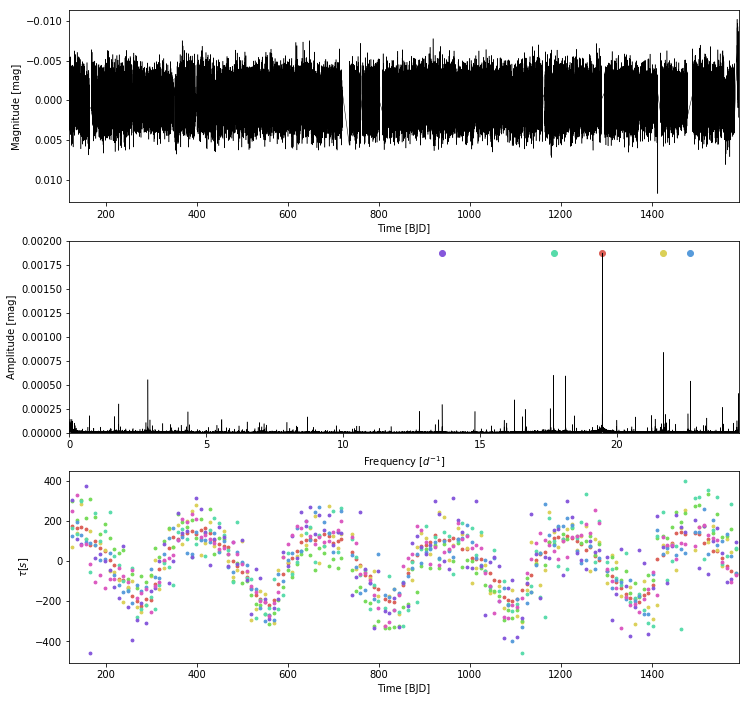

In [2]:
freqs = [19.47767438, 21.71213375, 30.80189732, 17.69941551, 22.69429318,13.62339726, 36.14642035]
td = TimeDelay.from_archive('KIC 9651065', freqs=freqs)
td.first_look()

The time delay looks good, so we can send it to the binary model class:

In [3]:
tdm = td.to_model()

Alternatively, if you already have time delays you can call the module without having to pass through TimeDelay

In [3]:
from timedelay.tdmodel import TDModel
tdm = TDModel(td.time_midpoints, td.time_delays, td.freqs)

One of the key parts of the model is the period. If you start with a poorly defined period then the sampler will have difficulty converging. I've set is to automatically find the period from the TD curve with the strongest amplitude, but you might consider changing it around.

In [4]:
tdm.period

period

Now the model is setup, we can use MCMC to sample. PyMC3 is really useful for stuff like this.

In [5]:
tdm.sample(draws=1000, tune=1000, chains=3)

/home/daniel/anaconda3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -4.1568e+06, ||grad|| = 6.6463e+06: 100%|██████████| 128/128 [00:00<00:00, 1258.46it/s] 
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [lighttime, eccen, varpi, tref, period]
Sampling 3 chains: 100%|██████████| 6000/6000 [00:13<00:00, 435.29draws/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
period,272.827581,0.006754,0.000116,272.814709,272.840300,3606.208475,0.999550
lighttime__0,185.861742,0.108435,0.002510,185.641018,186.065107,1693.316942,0.999773
lighttime__1,195.388612,0.109494,0.002495,195.179229,195.602516,2131.233131,1.001120
lighttime__2,195.898191,0.108722,0.002501,195.690974,196.112125,1746.639350,1.000683
lighttime__3,195.463676,0.107076,0.002458,195.249290,195.666087,1817.291768,0.999778
lighttime__4,188.660914,0.107859,0.002365,188.445220,188.866843,1936.932809,0.999884
lighttime__5,194.143083,0.107852,0.002372,193.935994,194.358703,1959.861206,1.000550
lighttime__6,193.888916,0.107811,0.002454,193.680349,194.100596,1806.880770,0.999851
tref,20.208160,0.043763,0.001132,20.121367,20.291513,1614.718700,0.999910
varpi,27.254204,0.001079,0.000029,27.252147,27.256345,1544.608615,1.000444


Once the sampler is done it'll return the optimised values of the model. The way I've defined the model is that for each frequency there is an independent lighttime. This isn't so great for PB1 stars (where only one star is pulsating in the binary), but works very well for PB2 systems. In PB2 systems, the lighttimes will be opposite in sign and can't be modelled by a single value. I have some things planned in the future to make this work better.

Finally, a good idea is to check the trace of the samples. They should for the most part be normally distributed.

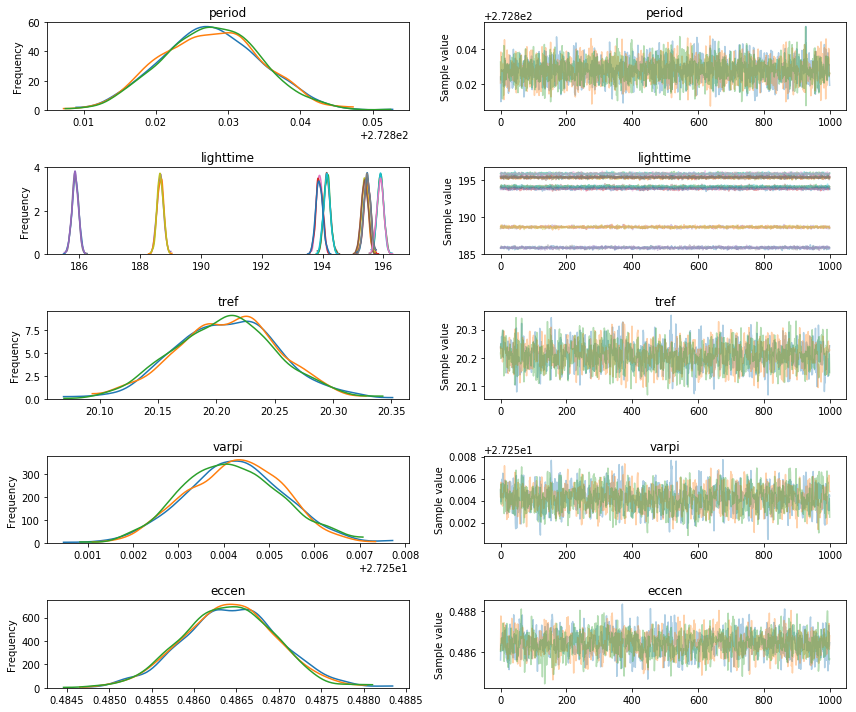

In [6]:
tdm.trace_plot()